In [1]:
# Program for finding the shape of the lipid bilayer with the initial direction of the director

from time import time 
import scipy.optimize
import numpy as np
import matplotlib
import pandas as pd
import csv
from google.colab import drive
import os
import sys

In [2]:
drive.mount('/content/gdrive')
os.chdir('/content/gdrive/My Drive/Data')
sys.path.append('/content/gdrive/My Drive/final_scripts')

import python_extras.Generall_functions as g_f
import python_extras.Special_functions as s_f
import python_extras.Energy_functions as e_f

Mounted at /content/gdrive
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# Определение начальных значений.

N = 40
delta_R = 0.1
z_start = -20
z_fin = 20
z = np.linspace(z_start, z_fin, num = N+1)

# Начальные и конечные радиусы
# est_R0e, est_R0i, est_R0m = 0., 0., 0.
# est_R1e, est_R1i, est_R1m = 0., 0., 0.
# est_R0e, est_R0i, est_R0m = 27.04, 4., 12.96
# est_R1e, est_R1i, est_R1m = 27.04, 4., 12.96
# est_R0e, est_R0i, est_R0m = 100., 100., 100.
# est_R1e, est_R1i, est_R1m = 100., 100., 100.
est_R0e, est_R0i, est_R0m = 6.5, 5, 3.5 # Рабочий вариант
est_R1e, est_R1i, est_R1m = 13., 10., 11.5 # Рабочий вариант

# стартовые значения - линейная интерполяция между начальными и конечными значениями
x0 = ((np.array([np.linspace(0.0, 0, num = N+1), np.linspace(0.0, 0, num = N+1),\
np.linspace(est_R0e, est_R1e, num = N+1), np.linspace(est_R0i, est_R1i, num = N+1), np.linspace(est_R0m, est_R1m, num = N+1)])).transpose()).ravel()

# добиваем справа и слева, чтобы можно было подставить гранусловия, если надо
# x0 = np.concatenate(([0, 0, est_R0e, est_R0i, 0], x0, [0, 0, est_R0e, est_R0i, 0]))

# parameters = (sigma_0, K_t, K_a, K_g, B,   h_0e, h_0i, J_Se, J_Si, delta_R)
# parameters =  (0.4,     10., 30., 0,   10., 1.6,  1.6,  0.0,  0.0,  delta_R)

parameters =  (0.04,     10., 30., 0,   10., 1.6,  1.6,  0.0,  0.0)

# left_values = (n_0e, n_0i, R_0e,    R_0i,    R_0m)
# left_values =  (0.2,  0.1, est_R0e, est_R0i, est_R0m)
# right_values = (0.3,  0.4, est_R1e, est_R1i, est_R1m)

left_values =  (0,  0, 6.5, None, None)
right_values = (0,  0, None, None, None)

point_type = 'point_tub_bi' # Нужно для определения класса, который будет использоваться в функциях

# energy = sqrt_tube_bi # Выбор функции для рассчета
energy_density = []
output_values = None

# boundaries = g_f.make_boundaries (( (-1., 1.), (-1., 1.), (0., 80.), (0., 80.), (0., 80.) ), N+1)

In [5]:
%%time

res = scipy.optimize.minimize( e_f.tub_bi, x0, args = (z, parameters, left_values, right_values) ) #, bounds = boundaries)

# res = scipy.optimize.basinhopping( energy, x0, minimizer_kwargs = { 'args' : (z, parameters, left_values, right_values) } )

x_min = res.x

en = np.pi*e_f.tub_bi(x_min, z, parameters, left_values, right_values, output_values, energy_density)
print(f'Energy = {en}')

out = g_f.mk_grid(point_type, x_min, z)

Energy = 512.711371780998
CPU times: user 11.8 s, sys: 7.75 s, total: 19.5 s
Wall time: 17.5 s


In [ ]:
data_number = g_f.define_number()
# data_number = None
print(data_number)

4


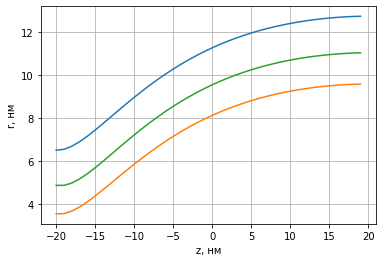

In [ ]:
s_f.graph( out, ['R_e','R_i', 'R_m'], data_number, y_label = 'r, нм', x_label ='z, нм')

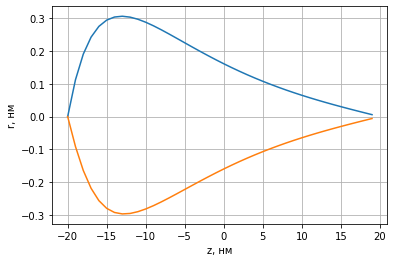

In [ ]:
s_f.graph( out, ['n_e','n_i'], data_number, y_label = 'r, нм', x_label ='z, нм')

In [7]:
data_number = 50

In [8]:
# save_grid ( point_type, grid, number, energy_res = None, left_values = None, right_values = None ):
s_f.save_grid( point_type, out, data_number, en, left_values, right_values, energy_density)

In [9]:
# def load_grid ( point_type, file_name)
output = s_f.load_grid(point_type,'grid_50.csv')